In [41]:
import mne
from mne.io import read_raw_eeglab
import os
import numpy as np
import h5py
from mne.preprocessing import ICA

In [71]:
import mne
import numpy as np
import os
import matplotlib.pyplot as plt
from mne.preprocessing import ICA
from mne.time_frequency import tfr_multitaper
from mne_icalabel import label_components
from mne import pick_types
from mne.preprocessing import find_bad_channels_maxwell
from autoreject import AutoReject
import scipy.signal as signal
from ipywidgets import interact, FloatSlider


Reading /Users/tracysanchezpacheco/Downloads/EEGraw.fdt
Reading 0 ... 268865  =      0.000 ...   268.865 secs...


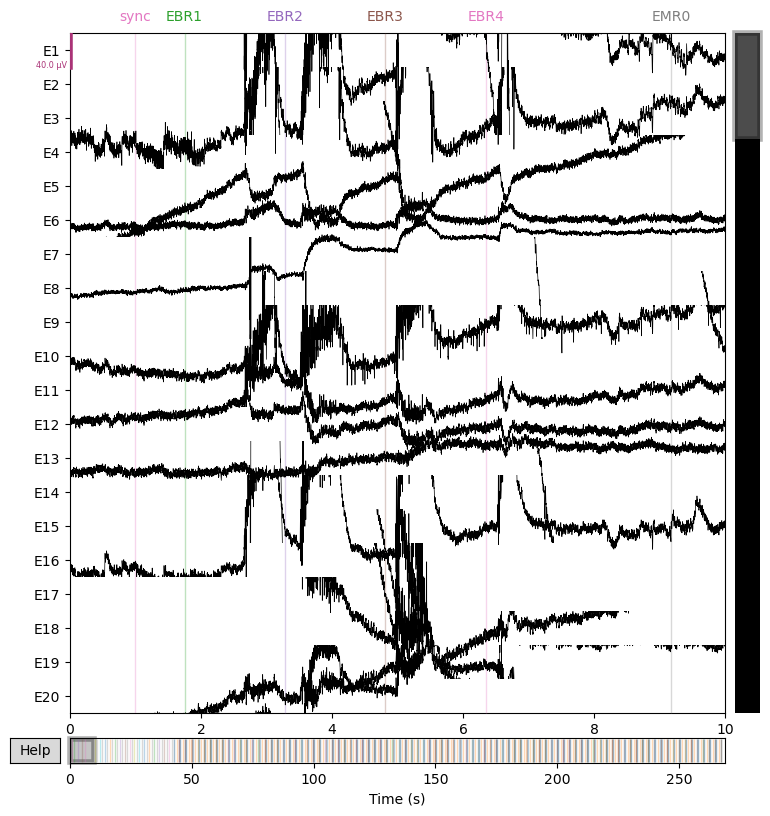

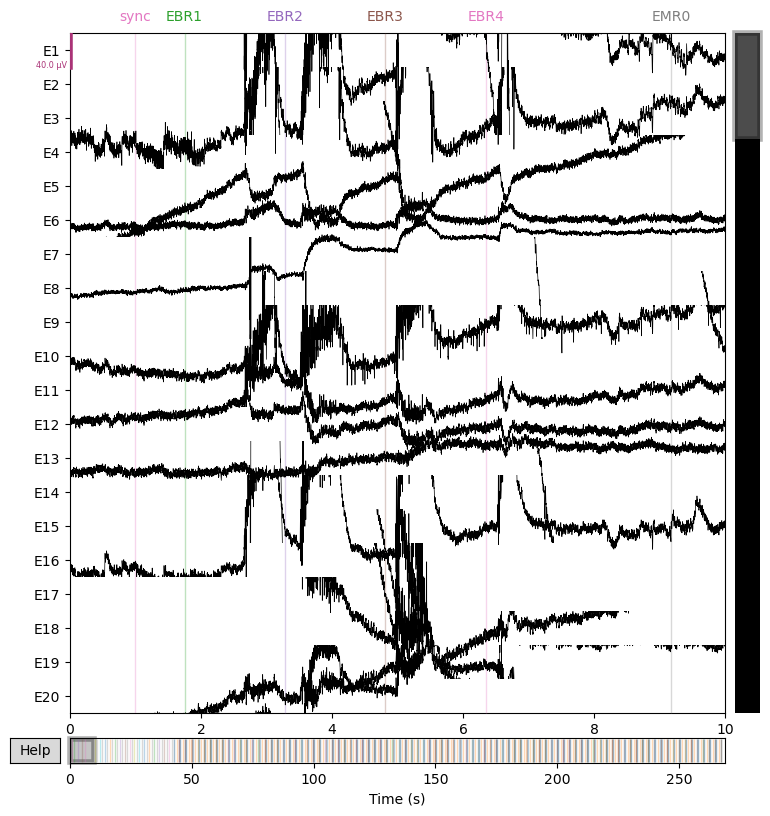

In [55]:
raw = mne.io.read_raw_eeglab('/Users/tracysanchezpacheco/Downloads/EEGraw.set', preload=True)
# ========== PATHS ==========
data_root = '/Users/tracysanchezpacheco/Downloads/EEGraw.set'
#eeglab_file = f'{data_root}/3_EEG-preprocessing/cleaned_with_ICA.set'
chanlocs_file = '/Users/tracysanchezpacheco/Downloads/EGI_128.ced'  # optional if MNE doesn't auto-load

raw.plot()

In [63]:
events, event_id = mne.events_from_annotations(raw)


Used Annotations descriptions: ['CA  ', 'CHI ', 'EBR1', 'EBR2', 'EBR3', 'EBR4', 'EMR0', 'EMR1', 'EMR2', 'EMR3', 'EMR4', 'EMR5', 'EMR6', 'EMR7', 'EMR8', 'FIX ', 'PP1L', 'PP1R', 'RK2L', 'RK2R', 'SC3L', 'SC3R', 'bt  ', 'sync']


In [67]:
events, event_id = mne.events_from_annotations(raw)

# Automatically use all event labels
epochs = mne.Epochs(
    raw,
    events,
    event_id=event_id,  # Just pass the full dictionary directly
    tmin=-0.2,
    tmax=1.0,
    baseline=(None, 0),
    detrend=1,
    preload=True
)


Used Annotations descriptions: ['CA  ', 'CHI ', 'EBR1', 'EBR2', 'EBR3', 'EBR4', 'EMR0', 'EMR1', 'EMR2', 'EMR3', 'EMR4', 'EMR5', 'EMR6', 'EMR7', 'EMR8', 'FIX ', 'PP1L', 'PP1R', 'RK2L', 'RK2R', 'SC3L', 'SC3R', 'bt  ', 'sync']
Not setting metadata
546 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 546 events and 1201 original time points ...
0 bad epochs dropped


In [ ]:
raw_ica = ICA(n_components=, method='amica')  # custom setup
raw_ica.apply(raw)


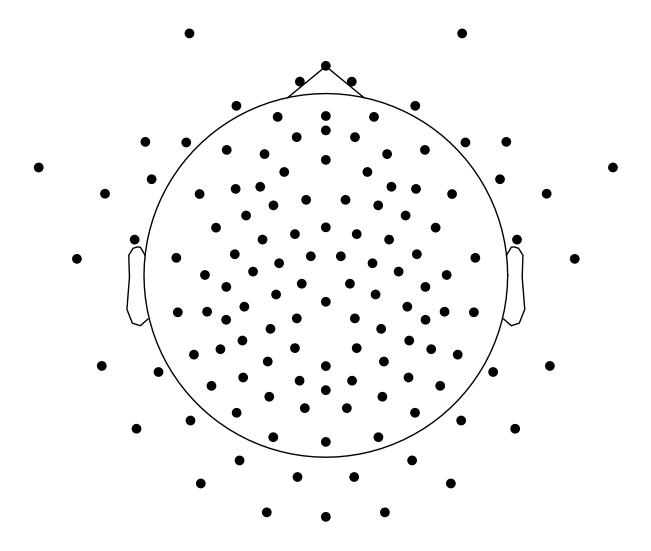

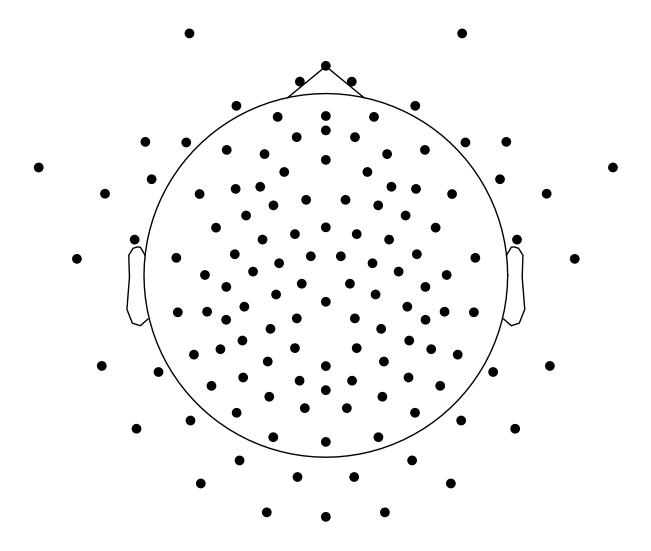

In [29]:
raw.info['chs'][:5]  # Preview first 5 channels
raw.info['dig']      # Digitization points if available
raw.plot_sensors()   # Visual layout


In [31]:
# Inspect basic info
print(raw.info)

<Info | 8 non-empty values
 bads: []
 ch_names: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, ...
 chs: 128 EEG
 custom_ref_applied: False
 dig: 131 items (3 Cardinal, 128 EEG)
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 128
 projs: []
 sfreq: 1000.0 Hz
>


In [33]:
# ========== FILTERING ==========
raw.filter(l_freq=0.2, h_freq=None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Filter length: 16501 samples (16.501 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.7s


<RawEEGLAB | EEGraw.fdt, 128 x 268866 (268.9 s), ~262.7 MiB, data loaded>

In [35]:
# ========== SET EEG REFERENCE (if needed) ==========
raw.set_eeg_reference('average')  # or specific: raw.set_eeg_reference(['Cz'])

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<RawEEGLAB | EEGraw.fdt, 128 x 268866 (268.9 s), ~262.7 MiB, data loaded>

In [ ]:
'/Users/tracysanchezpacheco/Downloads/EGI_128.ced'

Fitting ICA to data using 128 channels (please be patient, this may take a while)


/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_3067/3172683686.py:4: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 128 components


/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_3067/3172683686.py:4: RuntimeWarning: Using n_components=128 (resulting in n_components_=128) may lead to an unstable mixing matrix estimation because the ratio between the largest (2.3) and smallest (2e-21) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 15
  ica.fit(raw)


Fitting ICA took 173.5s.


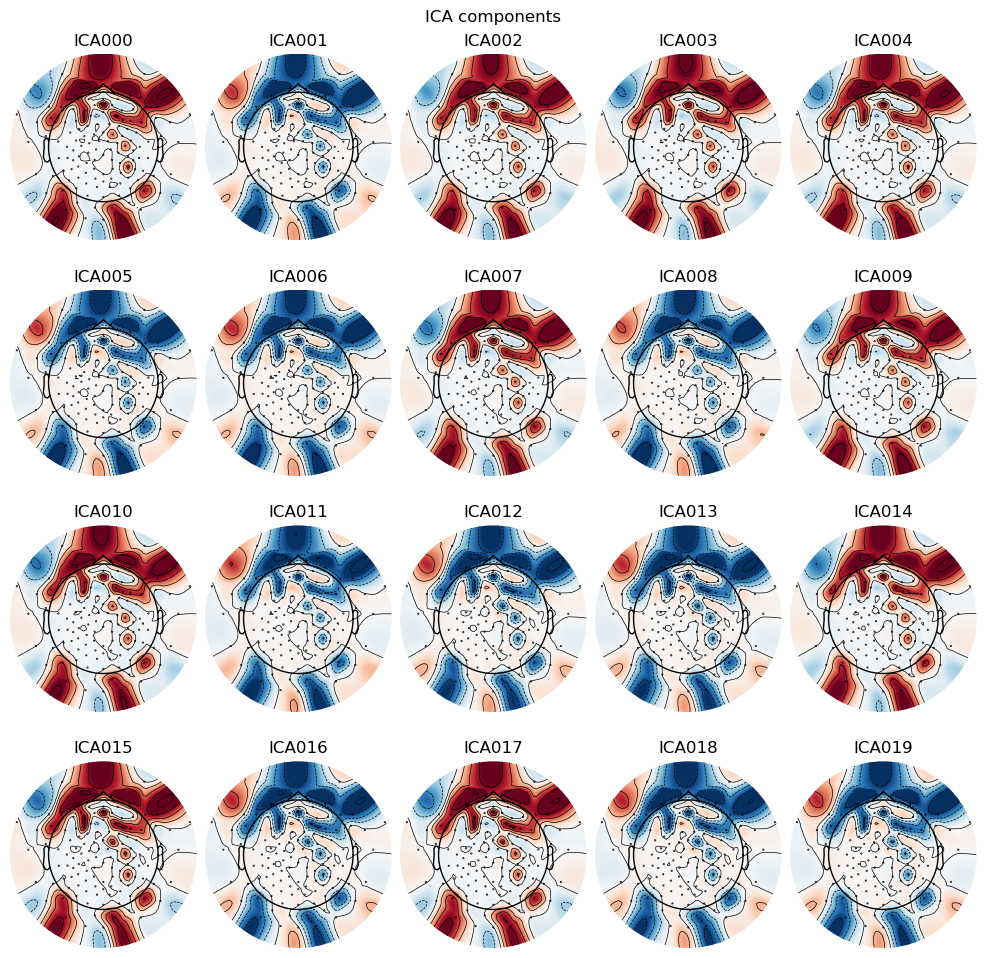

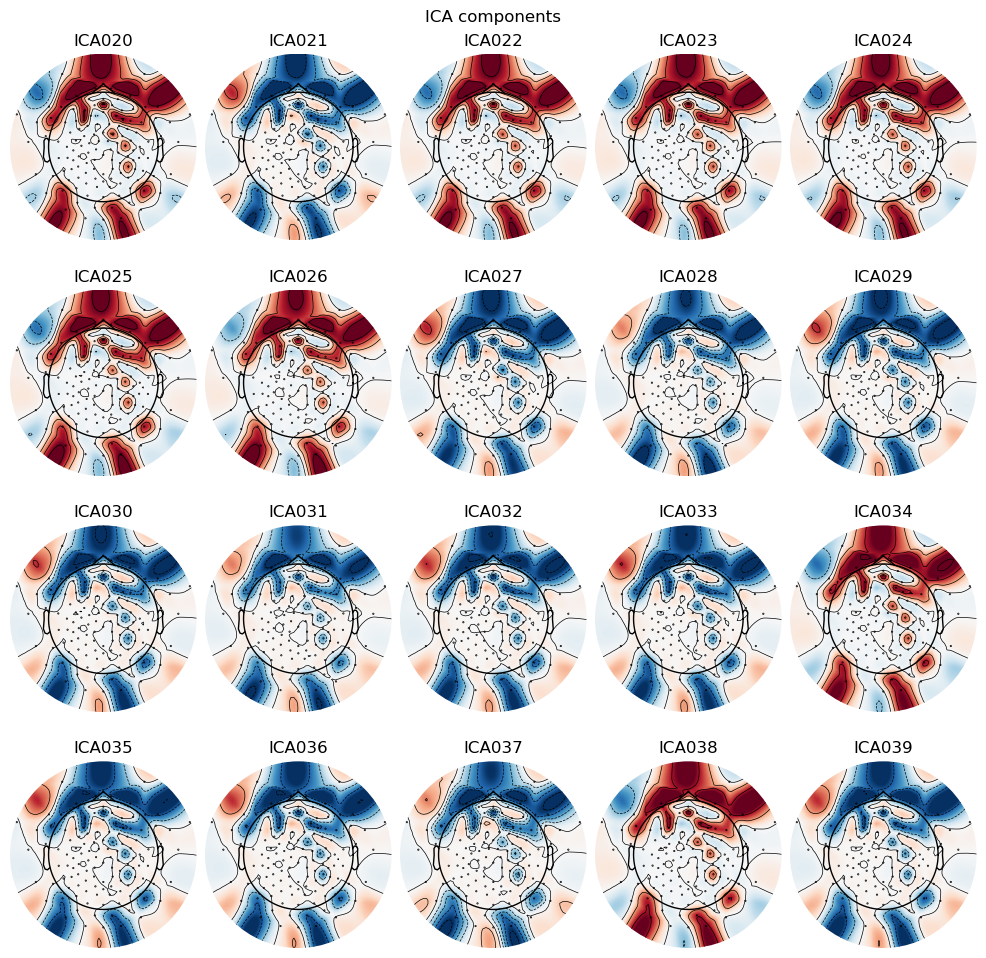

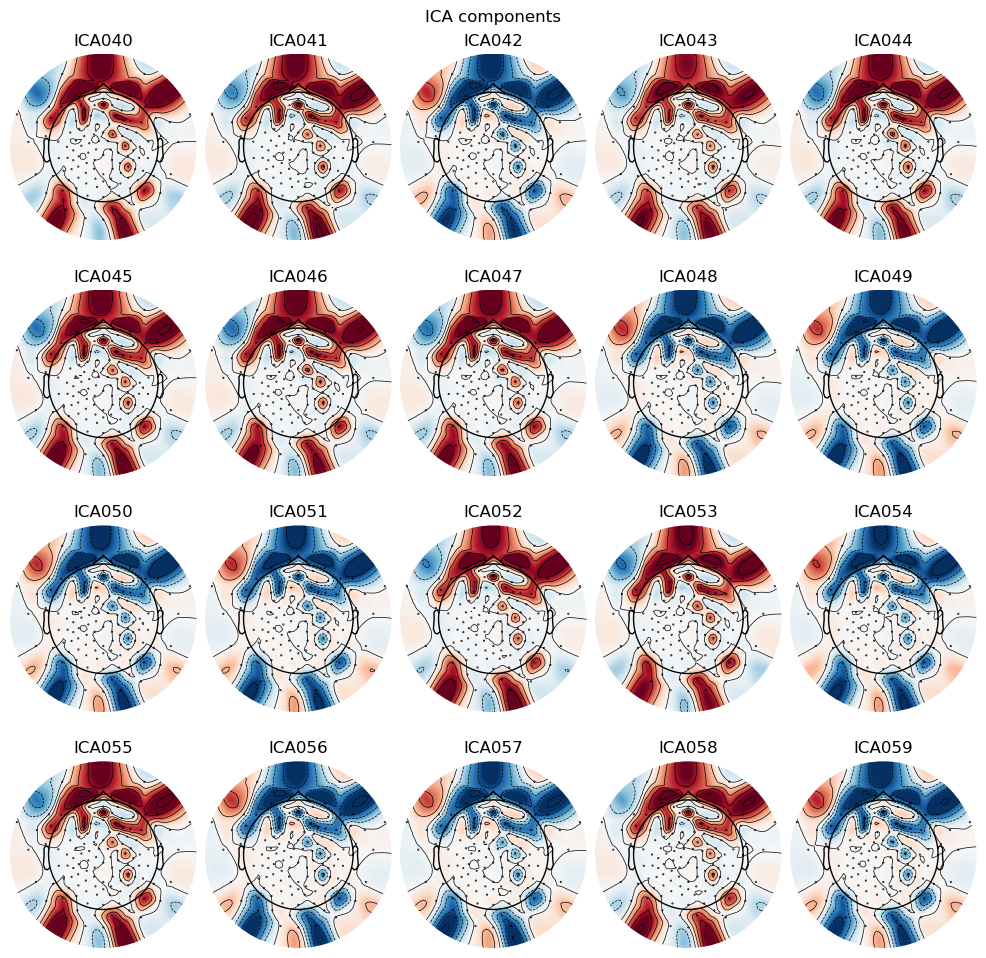

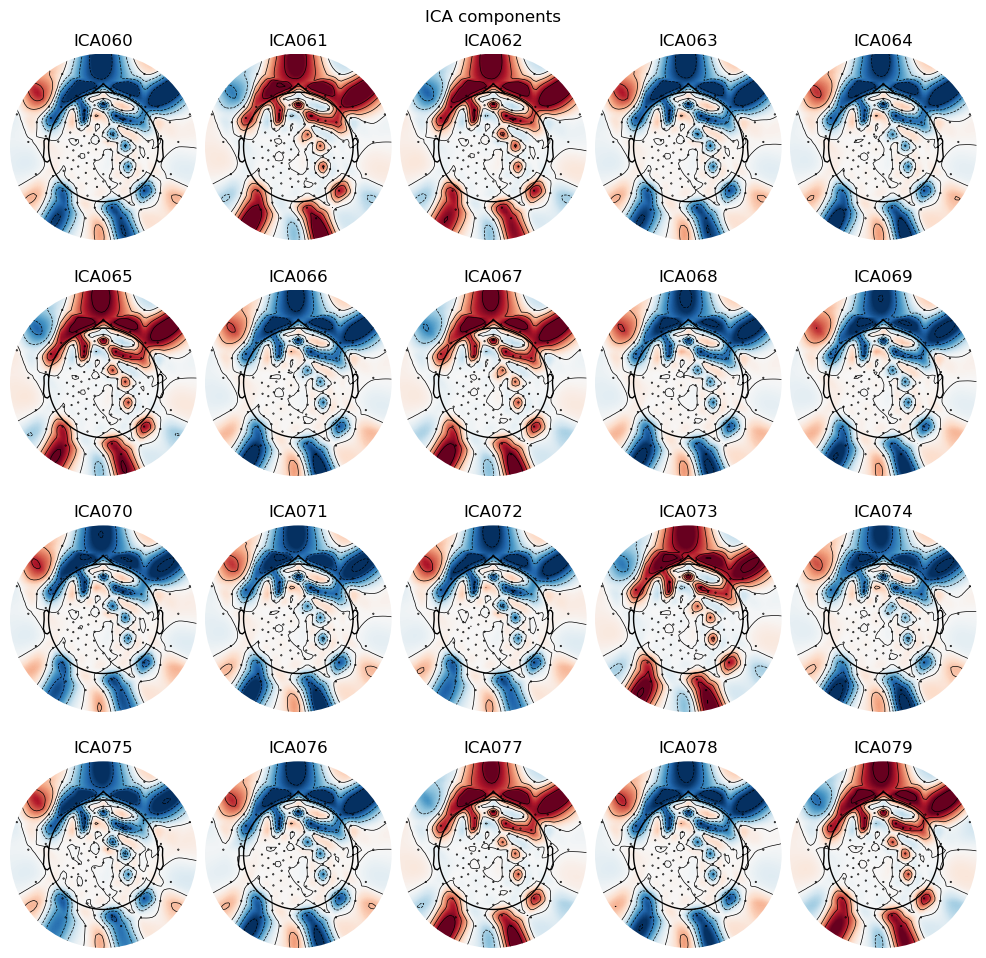

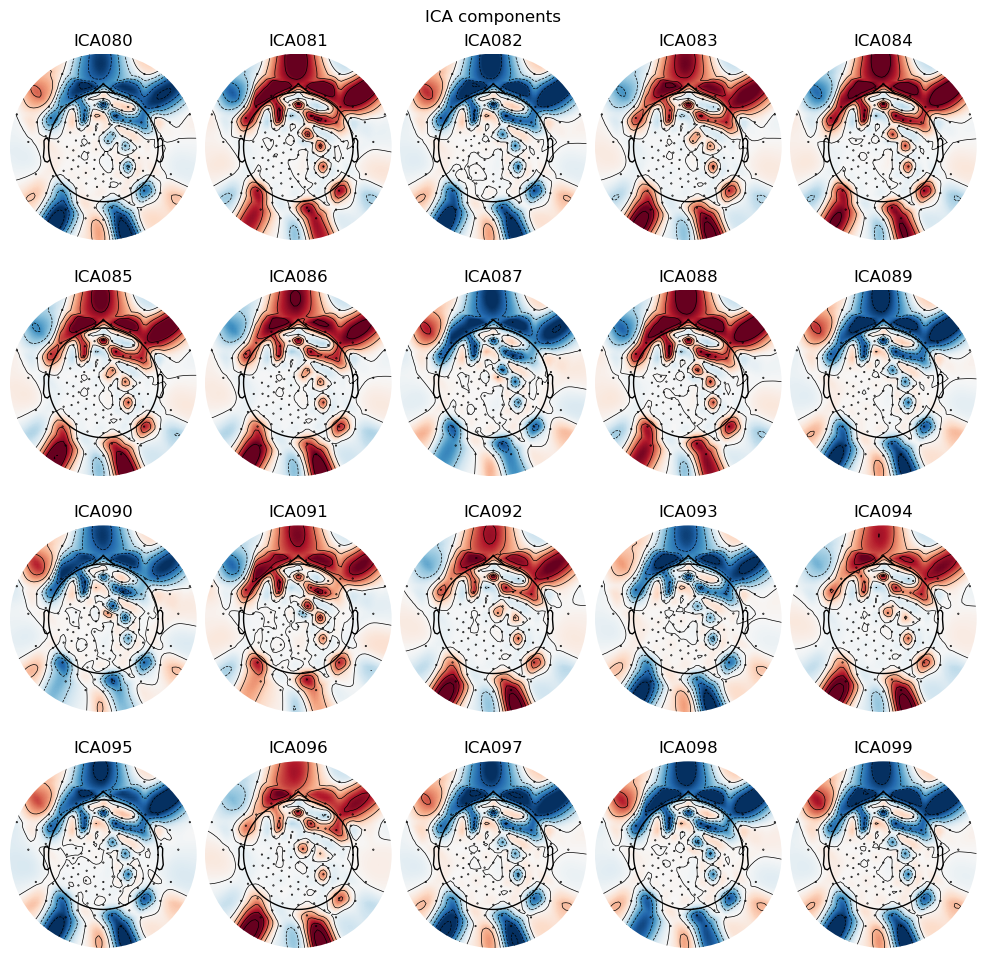

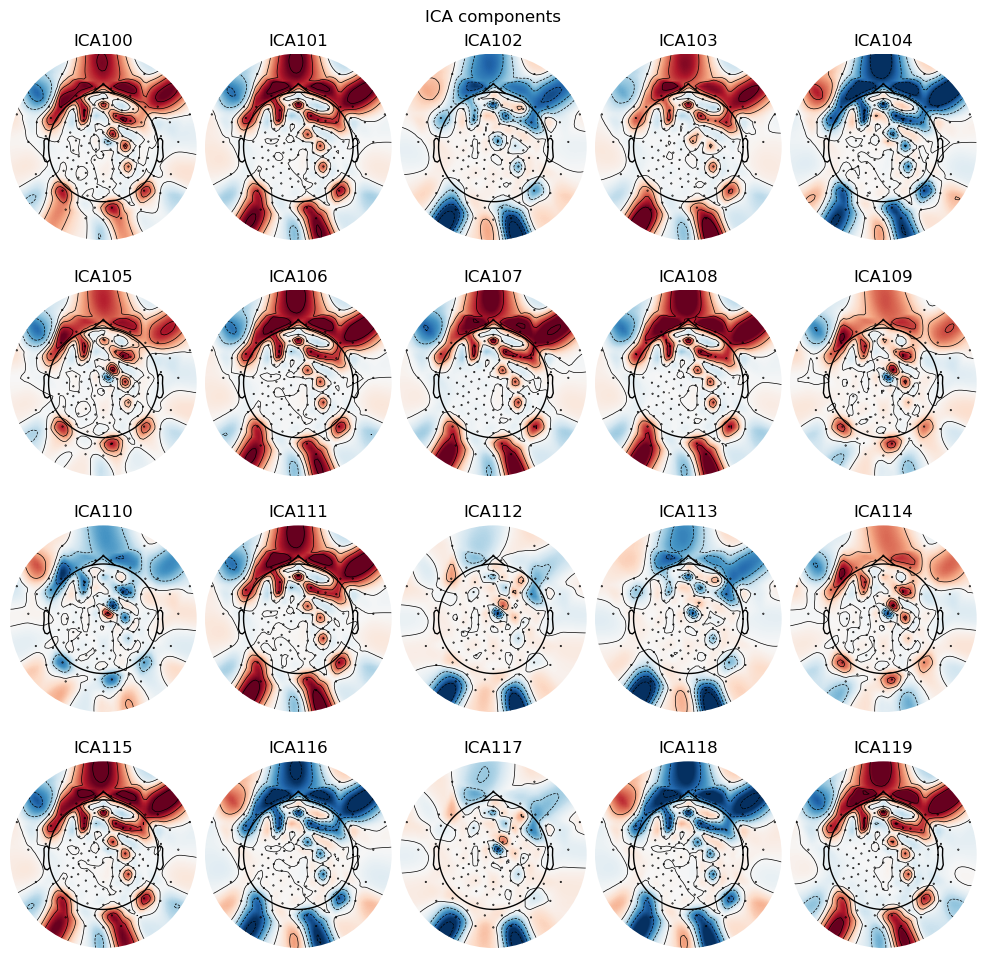

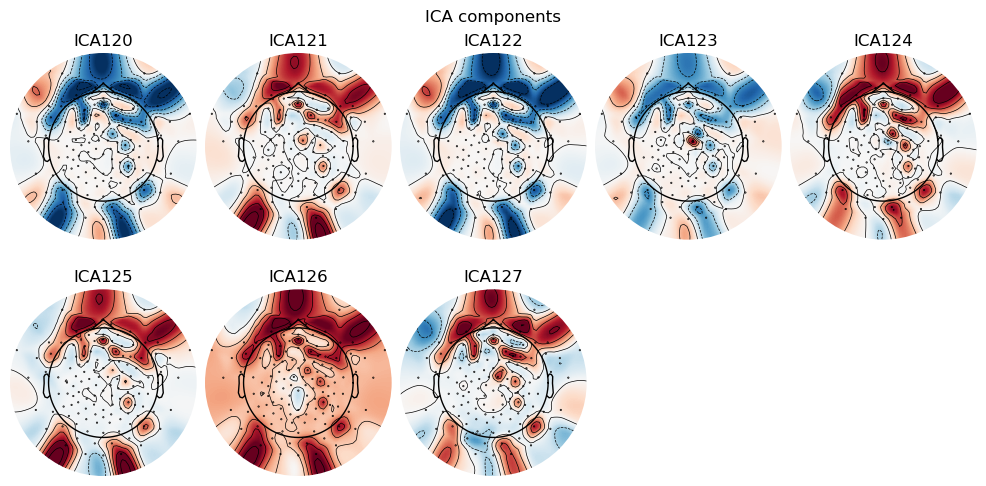

Applying ICA to Raw instance
    Transforming to ICA space (128 components)
    Zeroing out 0 ICA components
    Projecting back using 128 PCA components
Used Annotations descriptions: ['CA  ', 'CHI ', 'EBR1', 'EBR2', 'EBR3', 'EBR4', 'EMR0', 'EMR1', 'EMR2', 'EMR3', 'EMR4', 'EMR5', 'EMR6', 'EMR7', 'EMR8', 'FIX ', 'PP1L', 'PP1R', 'RK2L', 'RK2R', 'SC3L', 'SC3R', 'bt  ', 'sync']


In [45]:
# ========== ICA (if redoing in MNE) ==========

ica = ICA(n_components=128, method='fastica', random_state=42)
ica.fit(raw)
ica.plot_components()
ica.apply(raw)  # apply or skip based on inspection

# ========== EVENTS ==========
events, event_id = mne.events_from_annotations(raw)


In [73]:
# Automatically label the components using ICLabel
labels = label_components(raw, ica, method="iclabel")
print(labels)

/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_3067/2741695799.py:2: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  labels = label_components(raw, ica, method="iclabel")
/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_3067/2741695799.py:2: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  labels = label_components(raw, ica, method="iclabel")
/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_3067/2741695799.py:2: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was designed with extended infomax I

ImportError: Missing optional dependency. ICLabel requires either pytorch or onnxruntime. Use pip or conda to install one of them.